In [125]:
import pandas as pd
import numpy as np
import glob
#Path_prefix =  
#data1 = pd.read_csv('turnstile_190504.csv')
#data2 = pd.read_csv('turnstile_190511.csv')
#data = pd.concat([data1,data2])
#data.head()
#cd CSVs

In [126]:
cd CSVs

[Errno 2] No such file or directory: 'CSVs'
/Users/ritusinghal/Desktop/Metis/mta-project-1/CSVs


In [127]:
extension = 'txt'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


#combine all files in the list
data = pd.concat([pd.read_csv(f) for f in all_filenames ])
data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,00:00:00,REGULAR,7053483,2390505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,04:00:00,REGULAR,7053511,2390508
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,08:00:00,REGULAR,7053534,2390536
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,12:00:00,REGULAR,7053618,2390596
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,16:00:00,REGULAR,7053841,2390655
...,...,...,...,...,...,...,...,...,...,...,...
206852,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,05:00:00,REGULAR,5554,376
206853,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,09:00:00,REGULAR,5554,376
206854,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,13:00:00,REGULAR,5554,376
206855,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/03/2019,17:00:00,REGULAR,5554,376


In [128]:
type(data['DATE'])

pandas.core.series.Series

In [129]:
data['Date_Time'] = pd.to_datetime(data['DATE'], cache=True) + pd.to_timedelta(data['TIME'])

In [130]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,00:00:00,REGULAR,7053483,2390505,2019-05-11 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,04:00:00,REGULAR,7053511,2390508,2019-05-11 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,08:00:00,REGULAR,7053534,2390536,2019-05-11 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,12:00:00,REGULAR,7053618,2390596,2019-05-11 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,16:00:00,REGULAR,7053841,2390655,2019-05-11 16:00:00


,Station,Time,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,Total_Entries,Total_Exits,Total_Traffic
0,1 AV,2019-03-30 00:00:00,100798,955290458,12708,998668840,955189660,998656132,1997312264
1,1 AV,2019-03-30 04:00:00,101143,955290758,12724,998668864,955189615,998656140,1997312280
2,1 AV,2019-03-30 08:00:00,101226,955290823,12738,998668920,955189597,998656182,1997312364
3,1 AV,2019-03-30 12:00:00,101544,955290983,12820,998669156,955189439,998656336,1997312672
4,1 AV,2019-03-30 16:00:00,102335,955291475,12896,998669414,955189140,998656518,1997313036


In [131]:
data.dtypes

C/A                                                                             object
UNIT                                                                            object
SCP                                                                             object
STATION                                                                         object
LINENAME                                                                        object
DIVISION                                                                        object
DATE                                                                            object
TIME                                                                            object
DESC                                                                            object
ENTRIES                                                                          int64
EXITS                                                                            int64
Date_Time                                  

In [193]:
data.columns = data.columns.str.replace(' ', '')

In [194]:
data['Turnstile'] = data['C/A'] + data['UNIT'] + data['SCP'] + data['STATION']

In [195]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,00:00:00,REGULAR,7053483,2390505,2019-05-11 00:00:00,A002R05102-00-0059 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,04:00:00,REGULAR,7053511,2390508,2019-05-11 04:00:00,A002R05102-00-0059 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,08:00:00,REGULAR,7053534,2390536,2019-05-11 08:00:00,A002R05102-00-0059 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,12:00:00,REGULAR,7053618,2390596,2019-05-11 12:00:00,A002R05102-00-0059 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,16:00:00,REGULAR,7053841,2390655,2019-05-11 16:00:00,A002R05102-00-0059 ST


In [134]:
entry_start = data.groupby(['DATE','Turnstile'], as_index = False).ENTRIES.min()

In [135]:
entry_end = data.groupby(['DATE','Turnstile'], as_index = False).ENTRIES.max()

In [136]:
traffic_entries = data.groupby(['DATE','Turnstile'], as_index = False).ENTRIES.agg(['max','min'])
traffic_exits = data.groupby(['DATE','Turnstile'], as_index = False).EXITS.agg(['max','min'])

In [137]:
traffic_entries['Daily Entries Traffic'] = traffic_entries['max'] - traffic_entries['min']

In [138]:
traffic_entries.head()

max      min  Daily Entries Traffic
DATE       Turnstile                                                     
03/30/2019 A002R05102-00-0059 ST  6999796  6999064                    732
           A002R05102-00-0159 ST  6239372  6238770                    602
           A002R05102-03-0059 ST  1211761  1211476                    285
           A002R05102-03-0159 ST  1049913  1049198                    715
           A002R05102-03-0259 ST  6133502  6132784                    718

In [139]:
traffic_exits['Daily Exits Traffic'] = traffic_exits['max'] - traffic_exits['min']

In [140]:
traffic_exits.head()

max      min  Daily Exits Traffic
DATE       Turnstile                                                   
03/30/2019 A002R05102-00-0059 ST  2373837  2373568                  269
           A002R05102-00-0159 ST  1399289  1399138                  151
           A002R05102-03-0059 ST  4554337  4553166                 1171
           A002R05102-03-0159 ST  1622549  1621305                 1244
           A002R05102-03-0259 ST  8280248  8279411                  837

In [141]:
data.iloc[:,-3]

0         2390505
1         2390508
2         2390536
3         2390596
4         2390655
           ...   
206852        376
206853        376
206854        376
206855        376
206856        376
Name: EXITS, Length: 2250808, dtype: int64

In [196]:
grouped = data.groupby(['DATE','Turnstile','STATION'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})

In [197]:
grouped.head()

DATE              Turnstile STATION  ENTRIES             EXITS  \
                                                  min      max      min   
0  03/30/2019  A002R05102-00-0059 ST   59 ST  6999064  6999796  2373568   
1  03/30/2019  A002R05102-00-0159 ST   59 ST  6238770  6239372  1399138   
2  03/30/2019  A002R05102-03-0059 ST   59 ST  1211476  1211761  4553166   
3  03/30/2019  A002R05102-03-0159 ST   59 ST  1049198  1049913  1621305   
4  03/30/2019  A002R05102-03-0259 ST   59 ST  6132784  6133502  8279411   

            
       max  
0  2373837  
1  1399289  
2  4554337  
3  1622549  
4  8280248

In [198]:
grouped[('ENTRIES','Total_Entries')] = grouped[('ENTRIES','max')] - grouped[('ENTRIES', 'min')]

In [199]:
grouped[('EXITS','Total_Exits')] = grouped[('EXITS','max')] - grouped[('EXITS', 'min')]

In [200]:
grouped[('Total_Traffic','')] = grouped[('ENTRIES','Total_Entries')] + grouped[('EXITS', 'Total_Exits')]

In [201]:
grouped.head()

DATE              Turnstile STATION  ENTRIES             EXITS  \
                                                  min      max      min   
0  03/30/2019  A002R05102-00-0059 ST   59 ST  6999064  6999796  2373568   
1  03/30/2019  A002R05102-00-0159 ST   59 ST  6238770  6239372  1399138   
2  03/30/2019  A002R05102-03-0059 ST   59 ST  1211476  1211761  4553166   
3  03/30/2019  A002R05102-03-0159 ST   59 ST  1049198  1049913  1621305   
4  03/30/2019  A002R05102-03-0259 ST   59 ST  6132784  6133502  8279411   

                 ENTRIES       EXITS Total_Traffic  
       max Total_Entries Total_Exits                
0  2373837           732         269          1001  
1  1399289           602         151           753  
2  4554337           285        1171          1456  
3  1622549           715        1244          1959  
4  8280248           718         837          1555

In [204]:
grouped.columns = ['Date','Turnstile', 'Station', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX', 'ENTRIES_Total', 'EXITS_Total', 'Total_Traffic']

In [205]:
grouped.head()

,Date,Turnstile,Station,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,ENTRIES_Total,EXITS_Total,Total_Traffic
0,03/30/2019,A002R05102-00-0059 ST,59 ST,6999064,6999796,2373568,2373837,732,269,1001
1,03/30/2019,A002R05102-00-0159 ST,59 ST,6238770,6239372,1399138,1399289,602,151,753
2,03/30/2019,A002R05102-03-0059 ST,59 ST,1211476,1211761,4553166,4554337,285,1171,1456
3,03/30/2019,A002R05102-03-0159 ST,59 ST,1049198,1049913,1621305,1622549,715,1244,1959
4,03/30/2019,A002R05102-03-0259 ST,59 ST,6132784,6133502,8279411,8280248,718,837,1555


In [209]:
grouped['Date'] = pd.to_datetime(grouped['Date'], cache=True)
grouped['Week_Day'] = grouped['Date'].dt.day_name()
grouped.drop(['ENTRIES_MIN','ENTRIES_MAX','EXITS_MIN','EXITS_MAX', 'ENTRIES_Total', 'EXITS_Total', ], axis=1)

grouped = grouped[(np.abs(stats.zscore(grouped['Total_Traffic'])) < 3)] #filtering
grouped.head()

,Date,Turnstile,Station,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,ENTRIES_Total,EXITS_Total,Total_Traffic,Week_Day
0,2019-03-30,A002R05102-00-0059 ST,59 ST,6999064,6999796,2373568,2373837,732,269,1001,Saturday
1,2019-03-30,A002R05102-00-0159 ST,59 ST,6238770,6239372,1399138,1399289,602,151,753,Saturday
2,2019-03-30,A002R05102-03-0059 ST,59 ST,1211476,1211761,4553166,4554337,285,1171,1456,Saturday
3,2019-03-30,A002R05102-03-0159 ST,59 ST,1049198,1049913,1621305,1622549,715,1244,1959,Saturday
4,2019-03-30,A002R05102-03-0259 ST,59 ST,6132784,6133502,8279411,8280248,718,837,1555,Saturday


## Challenge 4

In [148]:
from pylab import rcParams

In [149]:
%matplotlib inline

In [150]:
rcParams['figure.figsize'] = 20,10

In [151]:
import matplotlib.pyplot as plt

In [152]:
plt.figure(figsize=(10,3))

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [153]:
test = 'A002R05102-00-0059 ST'

In [154]:
test_df = grouped[grouped.iloc[:,1] == test]

In [210]:
grouped[('Date_Time','')] = pd.to_datetime(grouped[('DATE','')], cache=True)
grouped[('Week_Day','')] = grouped[('Date_Time','')].dt.day_name()
grouped.head()

KeyError: ('DATE', '')

In [156]:
grouped[('Date_Time','')]

0        2019-03-30
1        2019-03-30
2        2019-03-30
3        2019-03-30
4        2019-03-30
            ...    
372442   2019-06-14
372443   2019-06-14
372444   2019-06-14
372445   2019-06-14
372446   2019-06-14
Name: (Date_Time, ), Length: 372447, dtype: datetime64[ns]

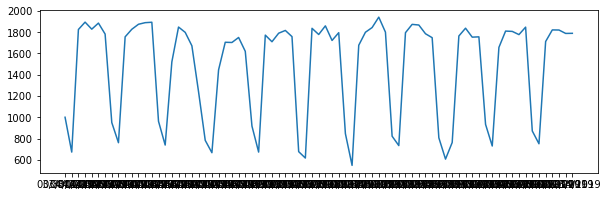

In [157]:
plt.figure(figsize=(10,3))
plt.plot(test_df[('DATE','')],test_df[('Total_Traffic','')])

## Challenge 6

In [158]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,00:00:00,REGULAR,7053483,2390505,2019-05-11 00:00:00,A002R05102-00-0059 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,04:00:00,REGULAR,7053511,2390508,2019-05-11 04:00:00,A002R05102-00-0059 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,08:00:00,REGULAR,7053534,2390536,2019-05-11 08:00:00,A002R05102-00-0059 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,12:00:00,REGULAR,7053618,2390596,2019-05-11 12:00:00,A002R05102-00-0059 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/11/2019,16:00:00,REGULAR,7053841,2390655,2019-05-11 16:00:00,A002R05102-00-0059 ST


In [159]:
data.shape

(2250808, 13)

In [160]:
station_entries = data.groupby(['DATE','STATION'], as_index = False).ENTRIES.agg(['max','min'])
station_exits = data.groupby(['DATE','STATION'], as_index = False).EXITS.agg(['max','min'])

In [161]:
station_entries['Daily Station Traffic'] = station_entries['max'] - station_entries['min']

In [162]:
station_exits['Daily Station Exits Traffic'] = station_exits['max'] - station_exits['min']

In [163]:
station_entries.head()

max      min  Daily Station Traffic
DATE       STATION                                                  
03/30/2019 1 AV            955292159   100798              955191361
           103 ST         2097077280   534967             2096542313
           103 ST-CORONA    15513634  1118239               14395395
           104 ST         2025908345   198508             2025709837
           110 ST           13815833  3425985               10389848

In [164]:
station_exits.head()

max      min  Daily Station Exits Traffic
DATE       STATION                                                        
03/30/2019 1 AV            998669812    12708                    998657104
           103 ST         1711173565   733881                   1710439684
           103 ST-CORONA    24431958   396701                     24035257
           104 ST         1907509946   127872                   1907382074
           110 ST           12418096  1358779                     11059317

In [202]:
station_grouped = grouped.groupby(['DATE','STATION'], as_index=False).agg({'ENTRIES': ['min', 'max'], 'EXITS': ['min', 'max']})

KeyError: 'ENTRIES'

In [166]:
station_grouped[('ENTRIES','Station_Entries')] = station_grouped[('ENTRIES','max')] - station_grouped[('ENTRIES', 'min')]
station_grouped[('EXITS','Station_Exits')] = station_grouped[('EXITS','max')] - station_grouped[('EXITS', 'min')]
station_grouped[('Total_Traffic','')] = station_grouped[('ENTRIES','Station_Entries')] + station_grouped[('EXITS', 'Station_Exits')]

In [167]:
station_grouped.head()

DATE        STATION  ENTRIES                EXITS              \
                                  min         max      min         max   
0  03/30/2019           1 AV   100798   955292159    12708   998669812   
1  03/30/2019         103 ST   534967  2097077280   733881  1711173565   
2  03/30/2019  103 ST-CORONA  1118239    15513634   396701    24431958   
3  03/30/2019         104 ST   198508  2025908345   127872  1907509946   
4  03/30/2019         110 ST  3425985    13815833  1358779    12418096   

          ENTRIES         EXITS Total_Traffic  
  Station_Entries Station_Exits                
0       955191361     998657104    1953848465  
1      2096542313    1710439684    3806981997  
2        14395395      24035257      38430652  
3      2025709837    1907382074    3933091911  
4        10389848      11059317      21449165

In [168]:
test_station = station_grouped[station_grouped.iloc[:,1] == '103 ST-CORONA']
station_grouped[('Date_Time','')] = pd.to_datetime(station_grouped[('DATE','')], cache=True)
station_grouped[('Week_Day','')] = station_grouped[('Date_Time','')].dt.day_name()
station_grouped.head()
#station_grouped.reset_index()
#test_station.head()

DATE        STATION  ENTRIES                EXITS              \
                                  min         max      min         max   
0  03/30/2019           1 AV   100798   955292159    12708   998669812   
1  03/30/2019         103 ST   534967  2097077280   733881  1711173565   
2  03/30/2019  103 ST-CORONA  1118239    15513634   396701    24431958   
3  03/30/2019         104 ST   198508  2025908345   127872  1907509946   
4  03/30/2019         110 ST  3425985    13815833  1358779    12418096   

          ENTRIES         EXITS Total_Traffic  Date_Time  Week_Day  
  Station_Entries Station_Exits                                     
0       955191361     998657104    1953848465 2019-03-30  Saturday  
1      2096542313    1710439684    3806981997 2019-03-30  Saturday  
2        14395395      24035257      38430652 2019-03-30  Saturday  
3      2025709837    1907382074    3933091911 2019-03-30  Saturday  
4        10389848      11059317      21449165 2019-03-30  Saturday

In [169]:
#test_station1 = station_grouped_filtered[station_grouped_filtered.iloc[:,1] == '47-50 STS ROCK']

In [170]:
station_grouped.columns = ['DATE', 'STATION', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX', 'ENTRIES', 'EXITS', 'Total_Traffic', 'Date_Time', 'Week_Day']

In [171]:
station_grouped.shape

(29023, 11)

In [172]:

from scipy import stats
station_grouped_filtered = station_grouped[(np.abs(stats.zscore(station_grouped['Total_Traffic'])) < 3)]

In [173]:
station_grouped_filtered.head()

,DATE,STATION,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,ENTRIES,EXITS,Total_Traffic,Date_Time,Week_Day
0,03/30/2019,1 AV,100798,955292159,12708,998669812,955191361,998657104,1953848465,2019-03-30,Saturday
2,03/30/2019,103 ST-CORONA,1118239,15513634,396701,24431958,14395395,24035257,38430652,2019-03-30,Saturday
4,03/30/2019,110 ST,3425985,13815833,1358779,12418096,10389848,11059317,21449165,2019-03-30,Saturday
5,03/30/2019,111 ST,0,50331793,354,16777216,50331793,16776862,67108655,2019-03-30,Saturday
6,03/30/2019,116 ST,39303,185438011,29201,218999087,185398708,218969886,404368594,2019-03-30,Saturday


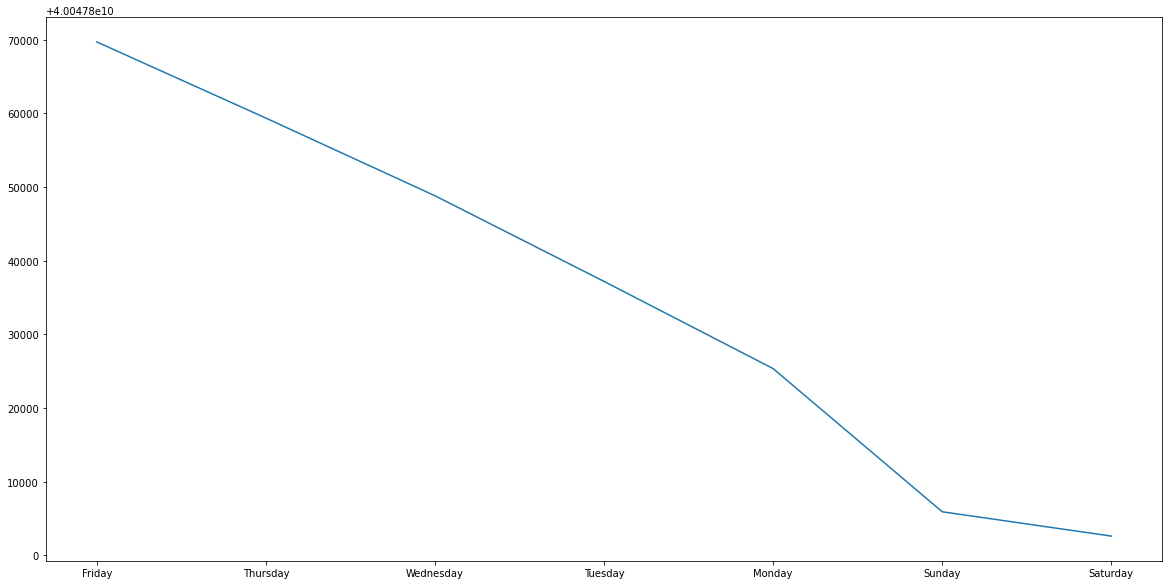

In [174]:

test_station1 = station_grouped_filtered[station_grouped_filtered['STATION'] == '183 ST']
test_station1.head()
Total_Weekly_ridership = test_station1.groupby(['Week_Day']).Total_Traffic.sum().reset_index()
Total_Weekly_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_Weekly_ridership.head(10)
plt.plot(Total_Weekly_ridership['Week_Day'],Total_Weekly_ridership['Total_Traffic'])

In [175]:
Total_Weekly_ridership = station_grouped_filtered.groupby(['Week_Day']).Total_Traffic.sum().reset_index()

In [223]:
Total_Weekly_ridership = grouped.groupby(['Week_Day']).Total_Traffic.sum().reset_index()

In [224]:
Total_Weekly_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_Weekly_ridership.head(10)


,Week_Day,Total_Traffic
5,Tuesday,121262470
6,Wednesday,119404592
4,Thursday,117274054
0,Friday,113739016
1,Monday,105627751
2,Saturday,60066147
3,Sunday,46424656


<BarContainer object of 7 artists>

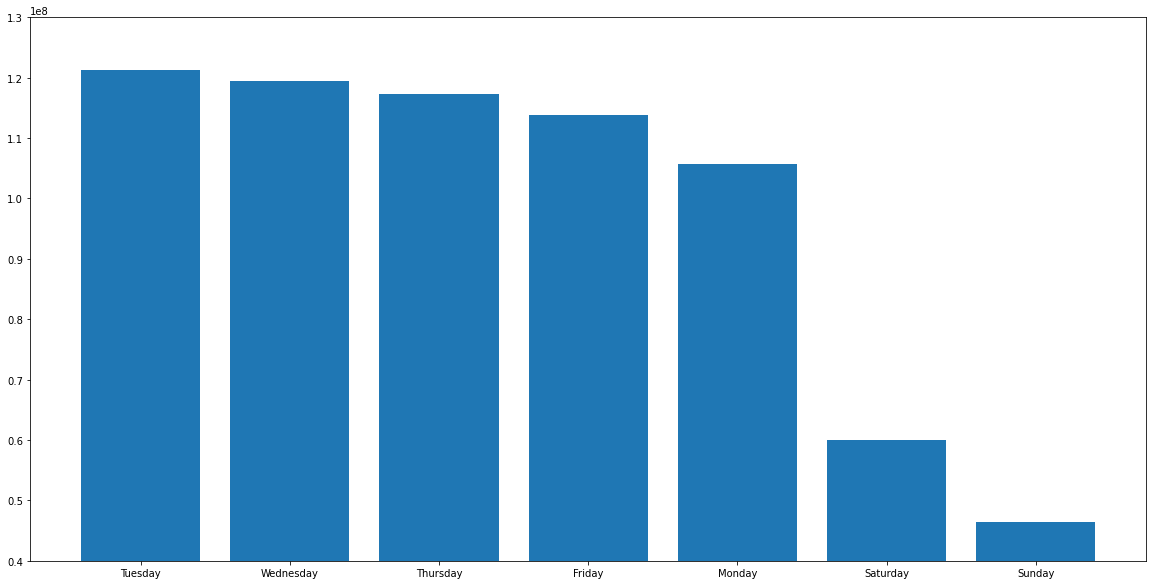

In [226]:
plt.ylim(40000000,130000000)
plt.bar(Total_Weekly_ridership['Week_Day'], Total_Weekly_ridership['Total_Traffic'])

In [178]:
#test_station = station_grouped[station_grouped.iloc[:,1] == '103 ST-CORONA']
station_grouped_filtered.columns = ['DATE', 'STATION', 'ENTRIES_MIN', 'ENTRIES_MAX', 'EXITS_MIN', 'EXITS_MAX', 'ENTRIES', 'EXITS', 'Total_Traffic', 'Date_Time', 'Week_Day']
#test_station.head()
#Answer = test_station.groupby(['Week_Day','Date_Time']).Total_Traffic.sum()
#fig, ax = plt.subplots(figsize=(15,7))
#test_station.groupby(['Week_Day','Date_Time']).Total_Traffic.sum().unstack().plot(ax=ax)
#type(Answer)
#Answer.shape
#plt.plot(Answer)
Total_ridership = station_grouped_filtered.groupby(['STATION']).Total_Traffic.sum().reset_index()
#Total_ridership = station_grouped_filtered.groupby(['STATION']).agg(Total_Traffic=('Total_traffic', sum),Week_Day = ('Week_Day')).reset_index()
type(Total_ridership)
Total_ridership


,STATION,Total_Traffic
0,1 AV,150446491280
1,103 ST,31395515008
2,103 ST-CORONA,2962790879
3,110 ST,1634291375
4,111 ST,5167366592
...,...,...
367,WOODLAWN,1133761287
368,WORLD TRADE CTR,262496850278
369,WTC-CORTLANDT,56295055393
370,YORK ST,2126312430


In [212]:
grouped.head()
Total_ridership = grouped.groupby(['Station']).Total_Traffic.sum().reset_index()

In [214]:
Total_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_ridership
Top5 = Total_ridership['Station'][0:10].tolist()
#if "CANAL ST" in Top5:
 #   print("TRUE")
#plt.hist(Total_ridership['Total_Traffic'])
#station_grouped_filtered['STATION'].head()
Top5_stations = grouped[grouped['Station'].isin(Top5)]
Top5_stations
Top5

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 'PATH NEW WTC',
 '14 ST-UNION SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '42 ST-PORT AUTH',
 'FULTON ST',
 '86 ST']

In [190]:
Total_ridership.sort_values(by=['Total_Traffic'],inplace = True, ascending = False)
Total_ridership
Top5 = Total_ridership['STATION'][0:10].tolist()
#if "CANAL ST" in Top5:
 #   print("TRUE")
#plt.hist(Total_ridership['Total_Traffic'])
#station_grouped_filtered['STATION'].head()
Top5_stations = station_grouped_filtered[station_grouped_filtered['STATION'].isin(Top5)]
Top5_stations

13      2019-03-30
35      2019-03-30
55      2019-03-30
97      2019-03-30
134     2019-03-30
           ...    
28817   2019-06-14
28855   2019-06-14
28870   2019-06-14
28997   2019-06-14
29019   2019-06-14
Name: Date_Time, Length: 770, dtype: datetime64[ns]

In [215]:
Top5_station_weekly = Top5_stations.groupby(['Station','Week_Day']).Total_Traffic.sum().reset_index()


In [181]:
stationlist = []
for i in range(0,29,7):
    stationlist.append([Top5_station_weekly.iloc[i:i+7,1:3]])
stationlist    


[[    Week_Day  Total_Traffic
  0     Friday    40042344463
  1     Monday    40042508117
  2   Saturday    40042552669
  3     Sunday    40042527139
  4   Thursday    40042387649
  5    Tuesday    40042470343
  6  Wednesday    40042429521],
 [     Week_Day  Total_Traffic
  7      Friday    40047869713
  8      Monday    40047825333
  9    Saturday    40047802588
  10     Sunday    40047805890
  11   Thursday    40047859366
  12    Tuesday    40047837180
  13  Wednesday    40047848814],
 [     Week_Day  Total_Traffic
  14     Friday    37796087581
  15     Monday    37796189723
  16   Saturday    37796211377
  17     Sunday    37796192851
  18   Thursday    37796112976
  19    Tuesday    37796165559
  20  Wednesday    37796138984],
 [     Week_Day  Total_Traffic
  21     Friday    39029450012
  22     Monday    41305260192
  23   Saturday    41305293639
  24     Sunday    41305272206
  25   Thursday    41305177936
  26    Tuesday    41305235030
  27  Wednesday    41305207047],
 [     W

           Station   Week_Day  Total_Traffic
21  34 ST-PENN STA     Friday        3613498
22  34 ST-PENN STA     Monday        3291226
23  34 ST-PENN STA   Saturday        2120179
24  34 ST-PENN STA     Sunday        1425439
25  34 ST-PENN STA   Thursday        3463050
26  34 ST-PENN STA    Tuesday        3402870
27  34 ST-PENN STA  Wednesday        3418111
            Station   Week_Day  Total_Traffic
49  GRD CNTRL-42 ST     Friday        2919250
50  GRD CNTRL-42 ST     Monday        2925174
51  GRD CNTRL-42 ST   Saturday        1151422
52  GRD CNTRL-42 ST     Sunday         879099
53  GRD CNTRL-42 ST   Thursday        3255150
54  GRD CNTRL-42 ST    Tuesday        3188192
55  GRD CNTRL-42 ST  Wednesday        3214588
            Station   Week_Day  Total_Traffic
14  34 ST-HERALD SQ     Friday        2362975
15  34 ST-HERALD SQ     Monday        2210276
16  34 ST-HERALD SQ   Saturday        1344077
17  34 ST-HERALD SQ     Sunday        1047034
18  34 ST-HERALD SQ   Thursday        2425

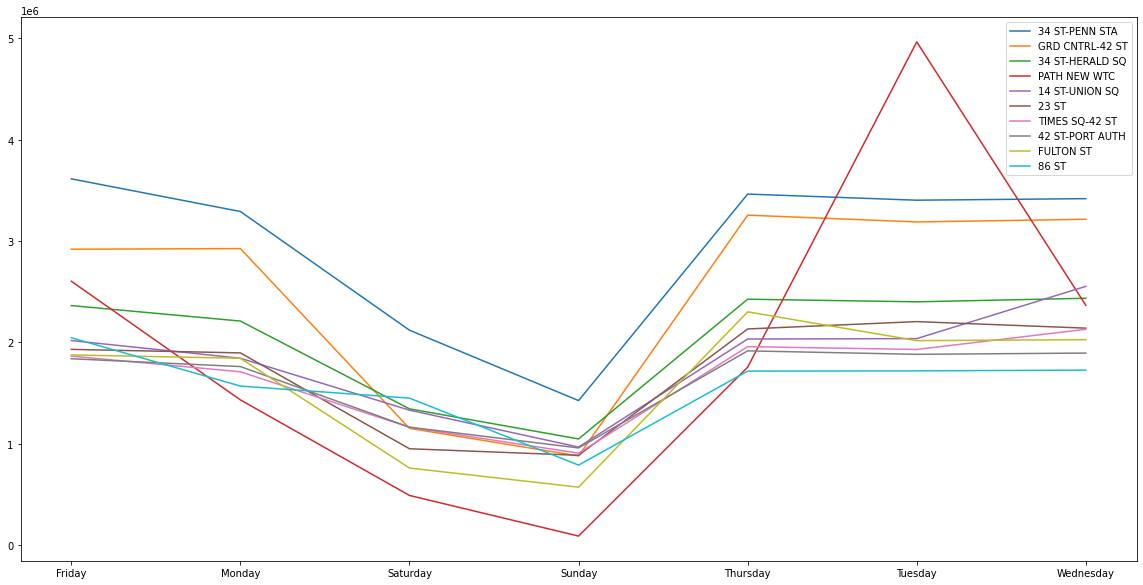

In [216]:
for stations in Top5:
    station = Top5_station_weekly[Top5_station_weekly['Station'] == stations]
    print(station)
    plt.plot(station['Week_Day'],station['Total_Traffic'],label = stations)
#plt.ylim(37000000000,42000000000)
plt.legend()
plt.show()    

In [188]:
Top5_station_Daily = Top5_stations.groupby(['STATION','DATE']).Total_Traffic.sum().reset_index()

      STATION        DATE  Total_Traffic
385  CANAL ST  03/30/2019     3755098034
386  CANAL ST  03/31/2019     3755098090
387  CANAL ST  04/01/2019     3755098887
388  CANAL ST  04/02/2019     3755098312
389  CANAL ST  04/03/2019     3755097415
..        ...         ...            ...
457  CANAL ST  06/10/2019     3754934715
458  CANAL ST  06/11/2019     3754932093
459  CANAL ST  06/12/2019     3754929194
460  CANAL ST  06/13/2019     3754926045
461  CANAL ST  06/14/2019     3754923759

[77 rows x 3 columns]
    STATION        DATE  Total_Traffic
77   183 ST  03/30/2019     3640679726
78   183 ST  03/31/2019     3640679966
79   183 ST  04/01/2019     3640681872
80   183 ST  04/02/2019     3640682848
81   183 ST  04/03/2019     3640683919
..      ...         ...            ...
149  183 ST  06/10/2019     3640742499
150  183 ST  06/11/2019     3640743595
151  183 ST  06/12/2019     3640744713
152  183 ST  06/13/2019     3640745632
153  183 ST  06/14/2019     3640746645

[77 rows x 3 col

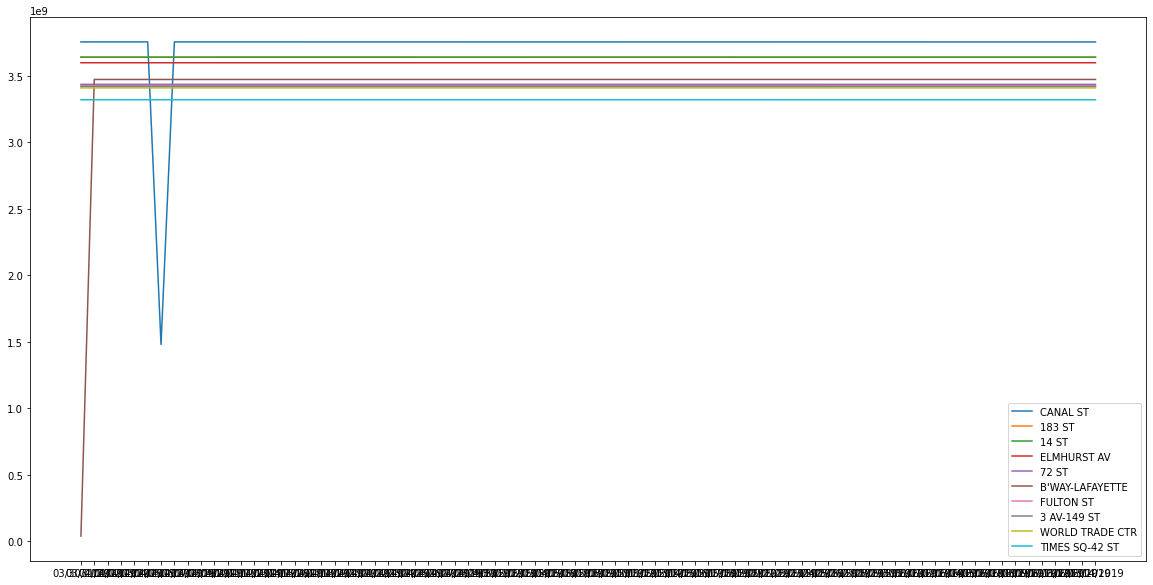

In [189]:
for stations in Top5:
    station = Top5_station_Daily[Top5_station_Daily['STATION'] == stations]
    print(station)
    plt.plot(station['DATE'],station['Total_Traffic'],label = stations)
#plt.ylim(37000000000,42000000000)
plt.legend()
plt.show()  

TypeError: unhashable type: 'numpy.ndarray'

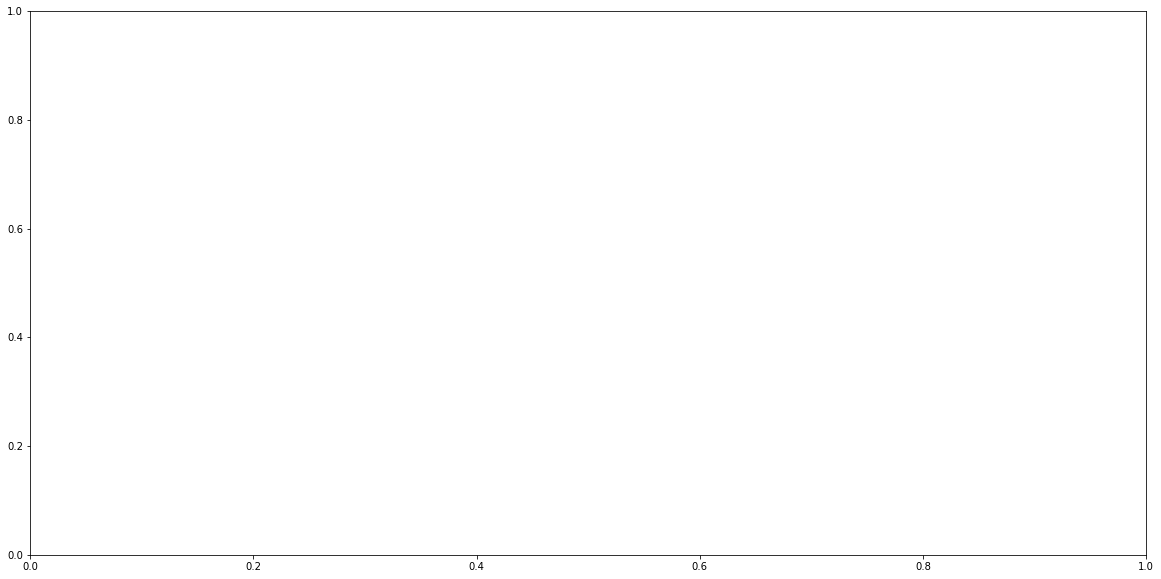

In [105]:
#import matplotlib.pyplot as plt
#for stations in stationlist:
#     timefilteredForce = plt.plot(stations)
#     timefilteredForce = plt.xlabel('points')
#     timefilteredForce = plt.ylabel('Force')

#plt.show()

(array([4., 2., 1., 1., 0., 0., 1., 0., 0., 1.]),
 array([11015056. , 11986987.7, 12958919.4, 13930851.1, 14902782.8,
        15874714.5, 16846646.2, 17818577.9, 18790509.6, 19762441.3,
        20734373. ]),
 <BarContainer object of 10 artists>)

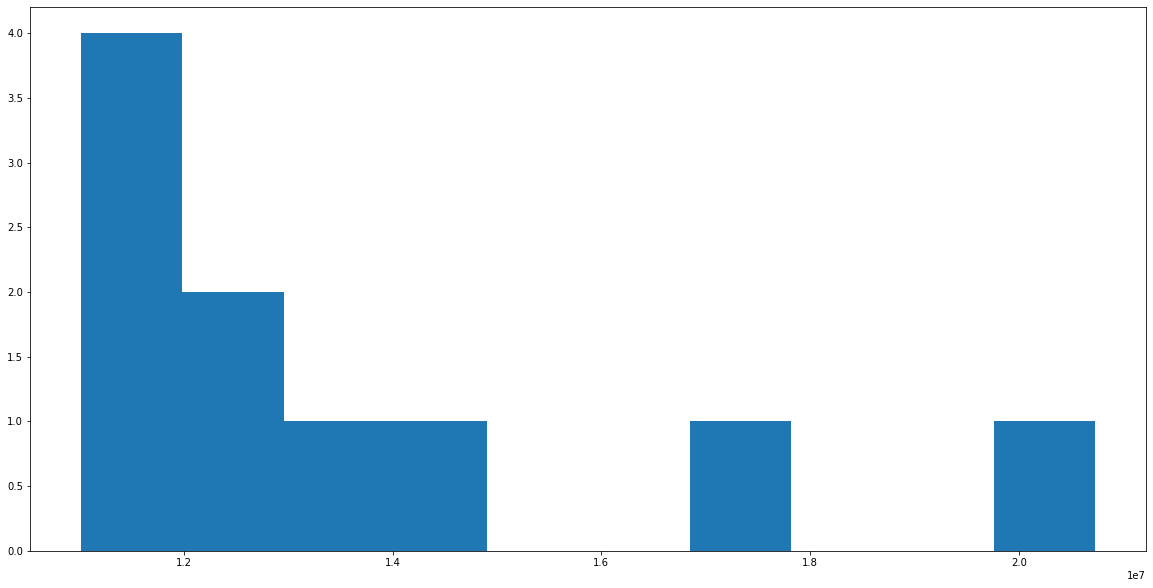

In [218]:
Row_list =[] 
indices = []
  
# Iterate over each row 
for index, rows in Total_ridership[:10].iterrows(): 
    # Create list for the current row 
#    my_list =[rows.STATION, rows.Total_Traffic] 
    my_list =rows.Total_Traffic 
    station_list = rows.Station
    # append the list to the final list 
    Row_list.append(my_list) 
    indices.append(station_list)

Row_list    
#plt.ylim(50000000000,56000000000)
#plt.bar(Row_list) 
#plt.hist([[x for x in y] for y in Row_list])
plt.hist(Row_list)
#plt.xticks(rotation = 'vertical')


In [219]:
indices

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 'PATH NEW WTC',
 '14 ST-UNION SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '42 ST-PORT AUTH',
 'FULTON ST',
 '86 ST']

<BarContainer object of 10 artists>

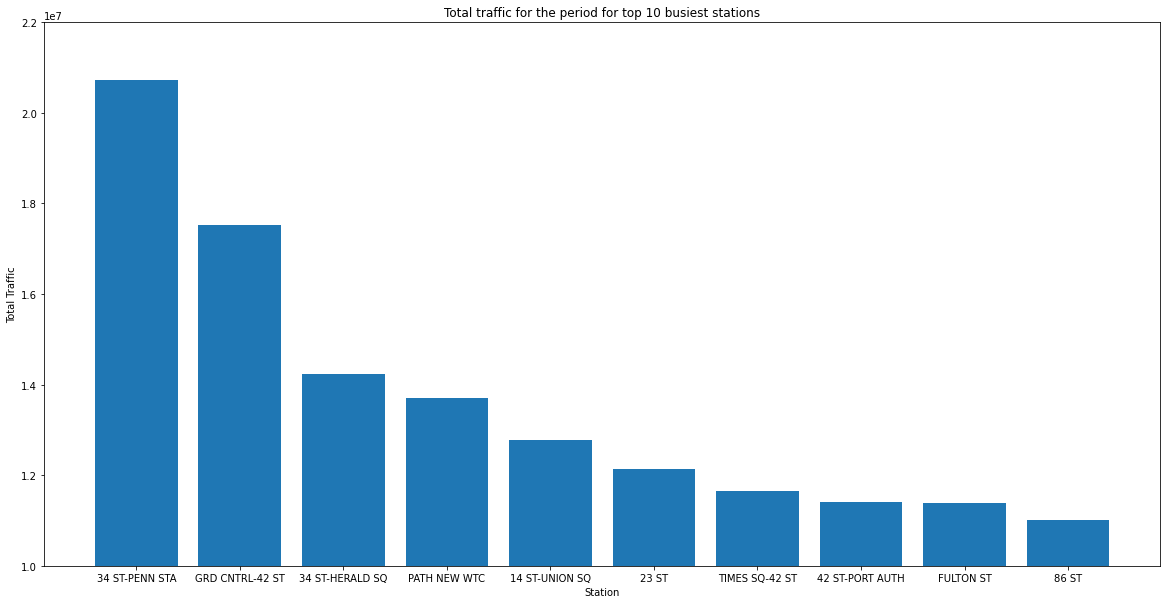

In [222]:
#indices = range(len(Row_list))
plt.ylim(10000000,22000000)
plt.xlabel("Station")
plt.ylabel("Total Traffic")
plt.title("Total traffic for the period for top 10 busiest stations")
plt.bar(indices, Row_list)

In [73]:
test_station.sort_values(by=[('Week_Day','')], inplace = True)

<ipython-input-73-f06c79419715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_station.sort_values(by=[('Week_Day','')], inplace = True)


## Challenge 7

In [65]:
plt.figure(figsize=(10,3))
#plt.plot(test_station[('Week_Day','')],test_station[('Total_Traffic','')])
test_station1.head()
#plt.plot(test_station1['Week_Day'],test_station['Total_Traffic'])

,DATE,STATION,ENTRIES_MIN,ENTRIES_MAX,EXITS_MIN,EXITS_MAX,ENTRIES,EXITS,Total_Traffic,Date_Time,Week_Day


<Figure size 720x216 with 0 Axes>

### New CSV File

In [75]:
data2 = pd.read_csv('turnstile_190511.csv')
data2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,00:00:00,REGULAR,7044468,2387700
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,04:00:00,REGULAR,7044495,2387706
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,08:00:00,REGULAR,7044509,2387740
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,12:00:00,REGULAR,7044568,2387757
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/04/2019,16:00:00,REGULAR,7044743,2387774
